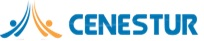

# **PROYECTO FINAL - DATA MINING**



---


Este proyecto analiza las ventas de la empresa Adventure Works utilizando la metodología CRISP-DM. Se aplicó un proceso sistemático para limpiar, transformar y analizar datos reales en formato Excel, con el fin de descubrir patrones de comportamiento de clientes, tendencias de ventas y oportunidades de mejora comercial.

Los datos fueron alojados en GitHub y procesados en Google Colab para asegurar accesibilidad y colaboración. Cada fase del análisis está justificada técnica y analíticamente para asegurar resultados confiables y accionables.


---



# **COMPRENSIÓN DEL NEGOCIO**

**PROBLEMA DE NEGOCIO.**

La empresa no tiene una visibilidad clara sobre qué productos, categorías o clientes generan mayores ingresos, ni puede identificar patrones de comportamiento de compra que le permitan planificar estrategias de marketing, retención de clientes o gestión de inventario más efectivas.

**OBJETIVO DEL PROYECTO**

Aplicar técnicas de minería de datos para descubrir patrones relevantes en las ventas de Adventure Works que permitan apoyar la toma de decisiones estratégicas en áreas de ventas, marketing y servicio al cliente.

**Objetivos específicos:**

•	Limpiar y unificar los datos de múltiples hojas (Ventas, Clientes, Productos, Fechas, etc.).

•	Identificar y visualizar las variables más influyentes en el total de ventas.

•	Predecir el valor de ventas en función de atributos como tipo de cliente, categoría del producto, y fecha.

•	Clasificar a los clientes según su comportamiento de compra (segmentación).

•	Evaluar el rendimiento de diferentes modelos de predicción y clasificación usando métricas.

**LIBRERIAS**

In [ ]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
from datetime import datetime
import os
from google.colab import files
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
!pip install unidecode

**URL DEL ARCHIVO EXCEL DESDE GITHUB**

In [ ]:
url = 'https://raw.githubusercontent.com/Willyejm/Proyecto_Final_Data_Miningg/main/Ventas%20Adventure%20Works.xlsx'
# Cargar todas las hojas
xls = pd.ExcelFile(url)
# Mostrar nombres de las hojas
print("Hojas encontradas:")
for i, name in enumerate(xls.sheet_names):
    print(f"{i+1}. {name}")
# Cargar la hoja 'Ventas' y guardarla como df_ventas
df_ventas = pd.read_excel(xls, sheet_name='Ventas')
# Mostrar las primeras filas
print("\nPrimeras filas de la hoja 'Ventas':")
display(df_ventas.head())

Hojas encontradas:
1. Ventas
2. Fechas
3. Clientes
4. Geografia
5. Productos
6. Subcategorias
7. Categorias

Primeras filas de la hoja 'Ventas':


,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,%IVA,IVA,Fecha Orden
0,575,24201,1,2384.0700,1481.9379,2384.0700,4,190.7256,2008-01-13
1,487,18309,1,54.9900,20.5663,54.9900,8,4.3992,2007-08-02
2,567,29091,1,742.3500,461.4448,742.3500,10,59.3880,2008-02-05
3,383,14253,1,1000.4375,605.6492,1000.4375,21,80.0350,2006-12-03
4,528,13917,1,4.9900,1.8663,4.9900,8,0.3992,2007-09-02


# **EXPLORACIÓN DEL DATASET**

**VENTAS:**

In [ ]:
# Análisis de la hoja 'Ventas'
print(f"Filas: {df_ventas.shape[0]}, Columnas: {df_ventas.shape[1]}")
df_ventas.info()
df_ventas.describe()

Filas: 60398, Columnas: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CodProducto  60398 non-null  int64         
 1   CodCliente   60398 non-null  int64         
 2   Cantidad     60398 non-null  int64         
 3   Precio       60398 non-null  float64       
 4   Coste        60398 non-null  float64       
 5   Venta        60398 non-null  float64       
 6   %IVA         60398 non-null  int64         
 7   IVA          60398 non-null  float64       
 8   Fecha Orden  60398 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 4.1 MB


,CodProducto,CodCliente,Cantidad,Precio,Coste,Venta,%IVA,IVA,Fecha Orden
count,60398.000000,60398.000000,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398
mean,437.557932,18841.685420,1.0,486.086911,286.065657,486.086911,9.167059,38.886954,2007-12-11 12:21:38.903937280
min,214.000000,11000.000000,1.0,2.290000,0.856500,2.290000,4.000000,0.183200,2005-07-01 00:00:00
25%,359.000000,14003.000000,1.0,7.950000,2.973300,7.950000,4.000000,0.636000,2007-10-05 00:00:00
50%,479.000000,18143.000000,1.0,29.990000,11.216300,29.990000,8.000000,2.399200,2008-01-15 00:00:00
75%,529.000000,23429.750000,1.0,539.990000,294.579700,539.990000,10.000000,43.199200,2008-04-20 00:00:00
max,606.000000,29483.000000,1.0,3578.270000,2171.294200,3578.270000,21.000000,286.261600,2008-07-31 00:00:00
std,118.088390,5432.430404,0.0,928.489892,552.457641,928.489892,5.505252,74.279193,NaN


**1. VERIFICAR VALORES NULOS**

In [ ]:
print("Valores nulos por columna:")
print(df_ventas.isnull().sum())

Valores nulos por columna:
CodProducto    0
CodCliente     0
Cantidad       0
Precio         0
Coste          0
Venta          0
%IVA           0
IVA            0
Fecha Orden    0
dtype: int64


**2. VER LOS TIPOS DE DATOS**

In [ ]:
print("\nTipos de datos:")
print(df_ventas.dtypes)


Tipos de datos:
CodProducto             int64
CodCliente              int64
Cantidad                int64
Precio                float64
Coste                 float64
Venta                 float64
%IVA                    int64
IVA                   float64
Fecha Orden    datetime64[ns]
dtype: object


**3. ESTADISTICA PARA COLUMNAS NUMÉRICAS**

In [ ]:
print("\nEstadísticas descriptivas:")
print(df_ventas.describe())


Estadísticas descriptivas:
        CodProducto    CodCliente  Cantidad        Precio         Coste  \
count  60398.000000  60398.000000   60398.0  60398.000000  60398.000000   
mean     437.557932  18841.685420       1.0    486.086911    286.065657   
min      214.000000  11000.000000       1.0      2.290000      0.856500   
25%      359.000000  14003.000000       1.0      7.950000      2.973300   
50%      479.000000  18143.000000       1.0     29.990000     11.216300   
75%      529.000000  23429.750000       1.0    539.990000    294.579700   
max      606.000000  29483.000000       1.0   3578.270000   2171.294200   
std      118.088390   5432.430404       0.0    928.489892    552.457641   

              Venta          %IVA           IVA                    Fecha Orden  
count  60398.000000  60398.000000  60398.000000                          60398  
mean     486.086911      9.167059     38.886954  2007-12-11 12:21:38.903937280  
min        2.290000      4.000000      0.183200      

**5. DETECCIÓN DE VALORES ATÍPICOS**

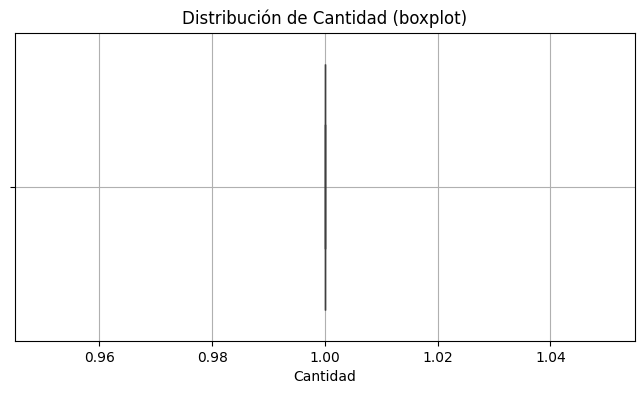

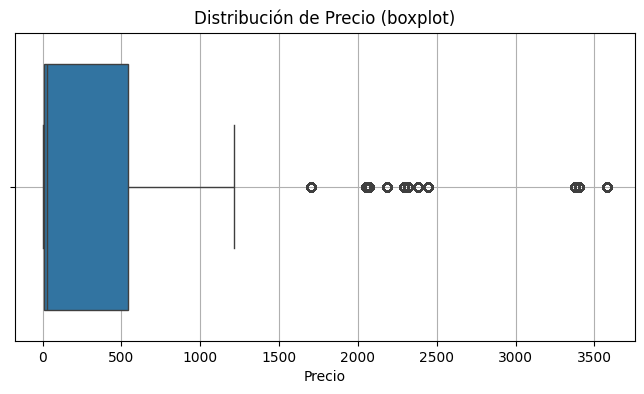

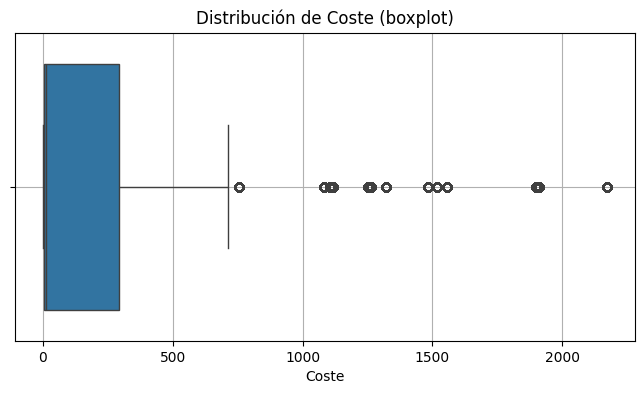

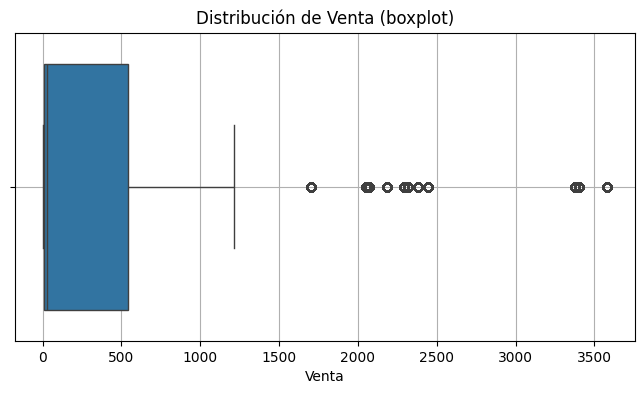

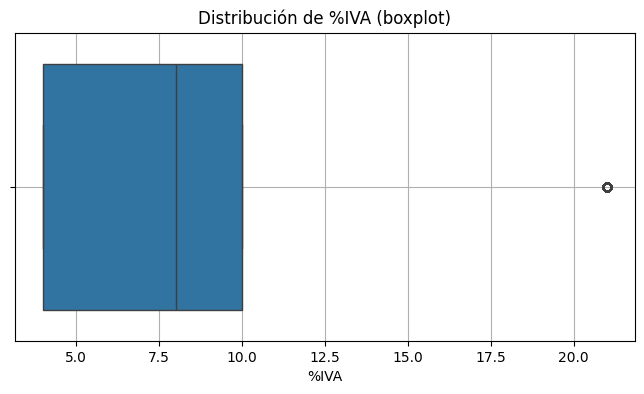

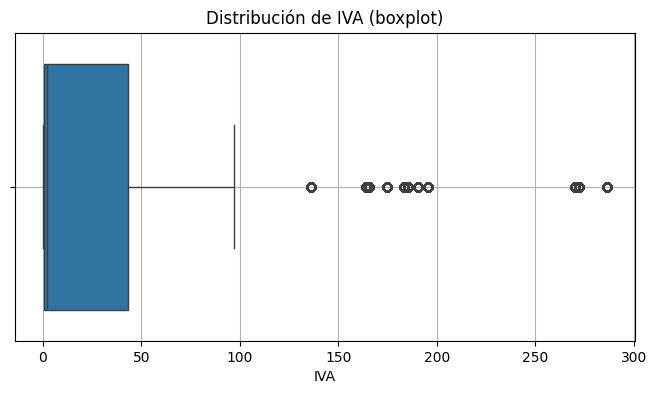

In [ ]:
# Boxplot para detectar outliers en columnas numéricas
columnas_numericas = ['Cantidad', 'Precio', 'Coste', 'Venta', '%IVA', 'IVA']
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_ventas[col])
    plt.title(f'Distribución de {col} (boxplot)')
    plt.grid()
    plt.show()

**6. CONVERSIÓN DE FECHA Y ANÁLISIS TEMPORAL**

Rango de fechas en la columna 'Fecha Orden':
2005-07-01 00:00:00 → 2008-07-31 00:00:00


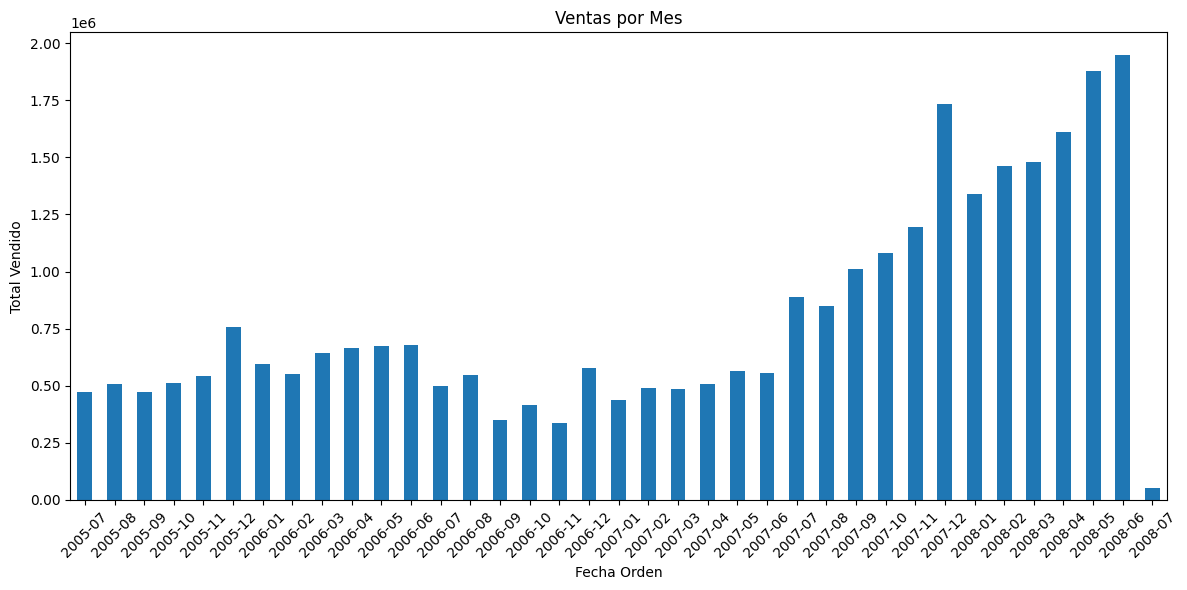

In [ ]:
# Convertir a datetime
df_ventas['Fecha Orden'] = pd.to_datetime(df_ventas['Fecha Orden'], dayfirst=True, errors='coerce')
# Ver rango de fechas
print("Rango de fechas en la columna 'Fecha Orden':")
print(df_ventas['Fecha Orden'].min(), "→", df_ventas['Fecha Orden'].max())
# Agrupar ventas por mes
ventas_por_mes = df_ventas.groupby(df_ventas['Fecha Orden'].dt.to_period('M'))['Venta'].sum()
# Visualización
ventas_por_mes.plot(kind='bar', figsize=(12, 6), title='Ventas por Mes')
plt.ylabel('Total Vendido')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**7. RELACIÓN ENTRE VARIABLES** (Matriz de Correlación)

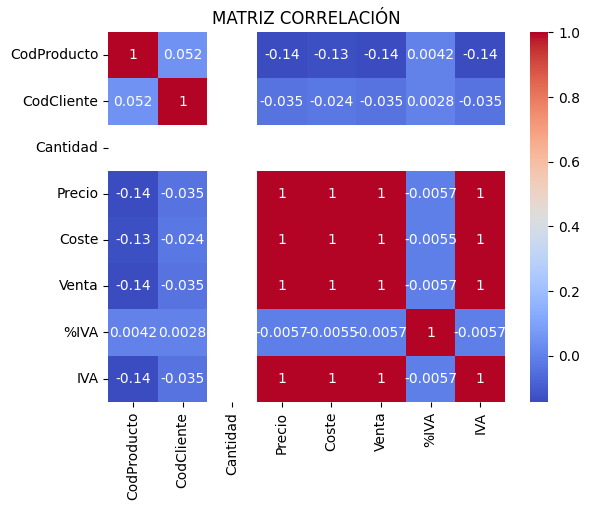

In [ ]:
correlacion = df_ventas.corr(numeric_only=True)
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('MATRIZ CORRELACIÓN')
plt.show()

**FECHAS:**

**1. CARGAR LA HOJA 'Fechas'**

In [ ]:
df_fechas = pd.read_excel(xls, sheet_name='Fechas')
print("\nPrimeras filas de la hoja 'Fechas':")
display(df_fechas.head())


Primeras filas de la hoja 'Fechas':


,Fecha,Día,Mes,Número Mes,Año
0,2010-08-15,15,August,8,2010
1,2005-04-11,11,April,4,2005
2,2008-02-29,29,February,2,2008
3,2007-05-29,29,May,5,2007
4,2007-03-08,8,March,3,2007


**2. DESCRIPCIÓN DEL DATASET - FECHAS**

In [ ]:
print("\nInformación general:")
print(df_fechas.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       2191 non-null   object
 1   Día         2191 non-null   int64 
 2   Mes         2191 non-null   object
 3   Número Mes  2191 non-null   int64 
 4   Año         2191 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.7+ KB
None


**3. MOSTRAR DIMENSIÓN DEL DATASET - FECHAS**

In [ ]:
print(f"Filas: {df_fechas.shape[0]}, Columnas: {df_fechas.shape[1]}")

Filas: 2191, Columnas: 5


**3. MOSTRAR LOS NOMBRES DE LAS COLUMNAS - FECHAS**

In [ ]:
print("\nColumnas:")
print(df_fechas.columns.tolist())


Columnas:
['Fecha', 'Día', 'Mes', 'Número Mes', 'Año']


**4. VERIFICAR VALORES NULOS - FECHAS**

In [ ]:
print("\nValores nulos por columna:")
print(df_fechas.isnull().sum())


Valores nulos por columna:
Fecha         0
Día           0
Mes           0
Número Mes    0
Año           0
dtype: int64


**5. ESTADÍSTICA DESCRIPTIVA - FECHAS**

In [ ]:
# Análisis solo para columnas numéricas
df_fechas.describe()
# Análisis solo para columnas categóricas
df_fechas.describe(include='object')

,Fecha,Mes
count,2191,2191
unique,2191,12
top,2008-07-25,August
freq,1,186


In [ ]:
print("Rango de fechas:")
print(f"Mínima: {df_fechas['Fecha'].min()}")
print(f"Máxima: {df_fechas['Fecha'].max()}")

Rango de fechas:
Mínima: 2005-01-01
Máxima: 2010-12-31


**CLIENTES:**

**1. CARGAR LA HOJA 'Clientes'**

In [ ]:
df_clientes = pd.read_excel(xls, sheet_name='Clientes')
print("\nPrimeras filas de la hoja 'Clientes':")
display(df_clientes.head())


Primeras filas de la hoja 'Clientes':


,IdCliente,CodGeografia,Nombre,Nombres2,Apellido,Nacimiento,EstadoCivil,Género,Ingresos,Hijos,Educación,Ocupación
0,27534,302,Candace,NaN,Chapman,1964-07-21,S,F,60000,4,Bachiller,Obrero Calificado
1,26893,276,Sharon,A,Deng,1975-12-24,M,F,40000,1,Bachiller,Obrero Calificado
2,26898,187,Ashley,R,Simmons,1961-06-16,S,F,10000,1,BACHILLER,Militar
3,12047,383,Alexandra,NaN,Davis,1974-03-25,S,F,40000,0,EFP,Obrero Calificado
4,26419,163,Geoffrey,NaN,Suri,1947-04-24,M,M,100000,3,Máster,Directivo


**2. VER TIPO DE DATOS - CLIENTES**

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IdCliente     18484 non-null  int64 
 1   CodGeografia  18484 non-null  int64 
 2   Nombre        18484 non-null  object
 3   Nombres2      10654 non-null  object
 4   Apellido      18484 non-null  object
 5   Nacimiento    18484 non-null  object
 6   EstadoCivil   18484 non-null  object
 7   Género        18484 non-null  object
 8   Ingresos      18484 non-null  int64 
 9   Hijos         18484 non-null  int64 
 10  Educación     18484 non-null  object
 11  Ocupación     18484 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.7+ MB


**3. VERIFICAR VALORES NULOS - CLIENTES**

In [ ]:
print("\nValores nulos por columna:")
df_clientes.isnull().sum()


Valores nulos por columna:


,0
IdCliente,0
CodGeografia,0
Nombre,0
Nombres2,7830
Apellido,0
Nacimiento,0
EstadoCivil,0
Género,0
Ingresos,0
Hijos,0


**4. ESTADÍSTICA DESCRIPTIVA - CLIENTES**

In [ ]:
# Análisis solo para columnas numéricas
df_clientes.describe()
# Análisis solo para columnas categóricas
df_clientes.describe(include='object')

,Nombre,Nombres2,Apellido,Nacimiento,EstadoCivil,Género,Educación,Ocupación
count,18484,10654,18484,18484,18484,18484,18484,18484
unique,670,43,375,8252,2,2,9,5
top,Katherine,A,Diaz,1967-05-14,M,M,Bachiller,Profesional
freq,97,1299,209,12,10011,9351,5350,5520


**5. DETECCION DE VALORES ATÍPICOS**

 ***A. Método del rango intercuartílico (IQR) – Ingresos***

In [ ]:
# Calcular IQR (Rango Intercuartílico) para la columna 'Ingresos'
Q1 = df_clientes['Ingresos'].quantile(0.25)
Q3 = df_clientes['Ingresos'].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers_ingresos = df_clientes[(df_clientes['Ingresos'] < limite_inferior) | (df_clientes['Ingresos'] > limite_superior)]

print(f"Número de valores atípicos en 'Ingresos': {outliers_ingresos.shape[0]}")
display(outliers_ingresos)


Número de valores atípicos en 'Ingresos': 309


,IdCliente,CodGeografia,Nombre,Nombres2,Apellido,Nacimiento,EstadoCivil,Género,Ingresos,Hijos,Educación,Ocupación
9,16675,8,Kristi,W,Arthur,1959-06-17,S,F,160000,0,ESO,Directivo
377,22106,352,Olivia,NaN,Long,1960-06-10,M,F,160000,1,EFP,Profesional
467,18388,372,Julia,A,Russell,1963-11-16,M,F,150000,3,Bachiller,Directivo
627,11292,361,Seth,NaN,Phillips,1961-11-05,S,M,150000,1,EFP,Profesional
814,14196,273,Felicia,R,Dominguez,1950-10-04,M,F,160000,3,EFP,Directivo
...,...,...,...,...,...,...,...,...,...,...,...,...
18179,21829,270,Carolyn,NaN,Rana,1955-01-18,M,F,170000,3,Máster,Profesional
18251,27964,243,Alicia,NaN,Shan,1949-05-14,S,F,150000,3,Máster,Directivo
18256,28879,272,Edwin,E,Xie,1957-12-01,S,M,170000,3,Bachiller,Directivo
18321,15106,265,Shannon,R,Navarro,1954-11-07,M,M,170000,3,Máster,Profesional


**A.1 VISUALIZACIÓN DE OUTLIERS - INGRESOS**

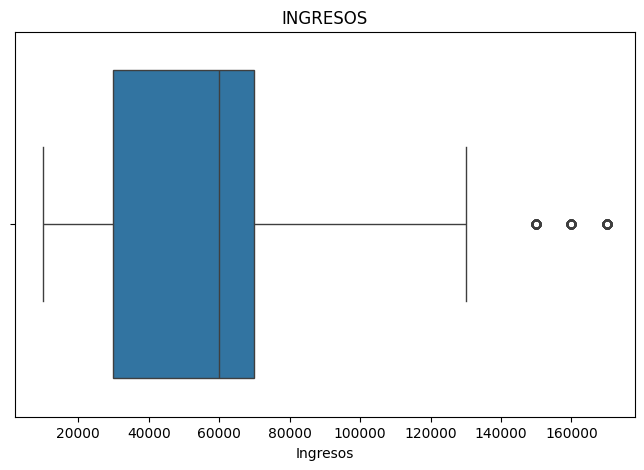

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clientes['Ingresos'])
plt.title("INGRESOS")
plt.show()

***B. DETECCIÓN DE OUTLIERA EN "Edad"***

In [ ]:
from datetime import datetime
df_clientes['Nacimiento'] = pd.to_datetime(df_clientes['Nacimiento'])
df_clientes['Edad'] = datetime.today().year - df_clientes['Nacimiento'].dt.year

***B.1 Método del rango intercuartílico (IQR) – Edad***

In [ ]:
# Ejemplo con 'Edad'
Q1 = df_clientes['Edad'].quantile(0.25)
Q3 = df_clientes['Edad'].quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR
outliers_edad = df_clientes[(df_clientes['Edad'] < limite_inf) | (df_clientes['Edad'] > limite_sup)]
display(outliers_edad)

,IdCliente,CodGeografia,Nombre,Nombres2,Apellido,Nacimiento,EstadoCivil,Género,Ingresos,Hijos,Educación,Ocupación,Edad
92,19456,155,Jesse,NaN,Perez,1927-07-27,M,M,20000,2,Máster,Militar,98
137,25330,372,Madison,T,Gonzales,1929-09-21,M,F,40000,1,ESO,Obrero Calificado,96
186,20865,133,Luis,NaN,Ross,1922-09-20,M,M,20000,2,EFP,Militar,103
195,17619,53,Chloe,NaN,Smith,1923-06-10,M,F,60000,5,Universitario,Obrero Calificado,102
356,15075,237,Alexa,NaN,Kelly,1920-09-15,M,F,10000,3,Bachiller,Funcionario,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16910,26742,34,James,E,Collins,1927-03-09,M,M,70000,3,EFP,Obrero Calificado,98
17110,15519,536,Jennifer,K,Evans,1921-11-10,M,F,10000,4,Universitario,Funcionario,104
17327,19430,268,Sharon,M,Goel,1920-07-13,M,F,20000,2,Bachiller,Funcionario,105
17861,22931,21,Logan,K,Johnson,1928-03-02,M,M,100000,5,ESO,Directivo,97


**B.2 VISUALIZACIÓN DE OUTLIERS - EDAD**

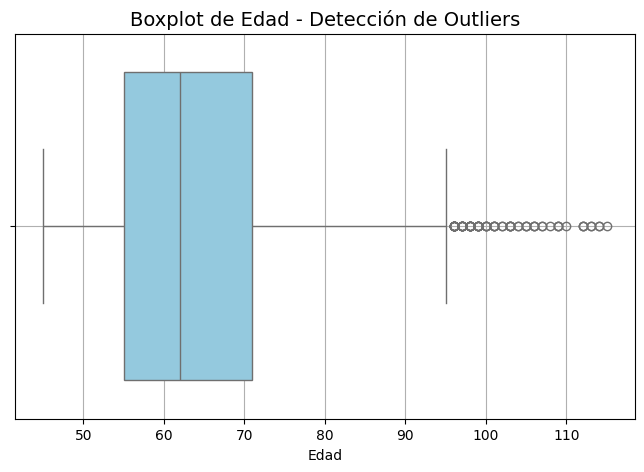

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clientes['Edad'], color='skyblue')
plt.title("Boxplot de Edad - Detección de Outliers", fontsize=14)
plt.xlabel("Edad")
plt.grid(True)
plt.show()

**6. FILAS DUPLICADAS - CLIENTES**

In [ ]:
print(f"\nFilas duplicadas: {df_clientes.duplicated().sum()}")


Filas duplicadas: 0


**GEOGRAFÍA**

**1. CARGAR LA HOJA "Geografía**"

In [ ]:
df_geografia = pd.read_excel(xls, sheet_name='Geografia')
print("\nPrimeras filas de la hoja 'Geografia':")
display(df_geografia.head())


Primeras filas de la hoja 'Geografia':


,IdGeografia,País,Ciudad
0,191,Francia,Boulogne-sur-Mer
1,329,Estados Unidos,Imperial Beach
2,565,Estados Unidos,La Vergne
3,377,Estados Unidos,Upland
4,96,Canada,Toronto


**2. VERIFICAR EL TIPO DE DATO - GEOGRAFIA**

In [ ]:
df_geografia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IdGeografia  655 non-null    int64 
 1   País         655 non-null    object
 2   Ciudad       655 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.5+ KB


**3. VERIFICAR VALORES ÚNICOS - GEOGRAFÍA**

In [ ]:
# Valores únicos por columna
print("\nValores únicos por columna:")
for col in df_geografia.columns:
    print(f"{col}: {df_geografia[col].nunique()} valores únicos")


Valores únicos por columna:
IdGeografia: 655 valores únicos
País: 6 valores únicos
Ciudad: 562 valores únicos


**4. CONTEO POR PAIS - GEOGRAFÍA**

In [ ]:
if 'País' in df_geografia.columns:
    print("\nDistribución por Pais:")
    display(df_geografia['País'].value_counts().head())


Distribución por Pais:


,count
País,
Estados Unidos,376
Canada,73
Alemania,65
Reino Unido,53
Francia,48


**5. FILAS DUPLICADAS - GEOGRAFÍA**

In [ ]:
print(f"\nFilas duplicadas: {df_geografia.duplicated().sum()}")


Filas duplicadas: 0


**PRODUCTOS:**

**1. CARGAR LA HOJA "PRODUCTOS"**

In [ ]:
df_productos = pd.read_excel(xls, sheet_name='Productos')
print("\nPrimeras filas de la hoja 'Productos':")
display(df_productos.head())


Primeras filas de la hoja 'Productos':


,IdProducto,CodSubcategoria,Producto,Color,PrecioCatálogo,Tamaño,RangoTamaño,Línea,Modelo
0,562,3.0,"Touring-1000 Amarillo, 50",Amarillo,2384.07,50,48-52 CM,T,Touring-1000
1,185,NaN,HL Road Rim,Amarillo,NaN,NaN,NaN,NaN,NaN
2,465,20.0,"Half-Finger Gloves, M",Negro,24.49,M,M,S,Half-Finger Gloves
3,81,NaN,Keyed Washer,Amarillo,NaN,NaN,NaN,NaN,NaN
4,329,2.0,"Road-650 Rojo, 48",Rojo,782.99,48,48-52 CM,R,Road-650


**2. DIMENSIONES DEL DATAFRAME - PRODUCTOS**

In [ ]:
print(f"Filas y columnas: {df_productos.shape}")

Filas y columnas: (606, 9)


**3. TIPO DE DATO - PRODUCTOS**

In [ ]:
print("\nTipos de datos:")
print(df_productos.dtypes)


Tipos de datos:
IdProducto           int64
CodSubcategoria    float64
Producto            object
Color               object
PrecioCatálogo     float64
Tamaño              object
RangoTamaño         object
Línea               object
Modelo              object
dtype: object


**4. DATOS FALTATES - PRODUCTOS**

In [ ]:
print("\nValores nulos por columna:")
print(df_productos.isnull().sum())


Valores nulos por columna:
IdProducto           0
CodSubcategoria    209
Producto             0
Color              252
PrecioCatálogo     211
Tamaño             307
RangoTamaño        307
Línea              226
Modelo             209
dtype: int64


 **5. ESTADÍSTICA DESCRIPTIVA PARA COLUMNAS NUMÉRICAS**

In [ ]:
print("\nEstadística Descriptiva:")
display(df_productos.describe())


Estadística Descriptiva:


,IdProducto,CodSubcategoria,PrecioCatálogo
count,606.00000,397.000000,395.000000
mean,303.50000,12.128463,747.661762
std,175.08141,9.423328,838.708451
min,1.00000,1.000000,2.290000
25%,152.25000,2.000000,69.990000
50%,303.50000,13.000000,364.090000
75%,454.75000,16.000000,1204.324800
max,606.00000,37.000000,3578.270000


**6. ANÁLISIS DE COLUMNAS CATEGÓRICAS**

In [ ]:
# Conteo de valores únicos por categoría
columnas_categoricas = ['Color', 'Tamaño', 'RangoTamaño', 'Línea', 'Modelo']
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df_productos[col].value_counts())


Columna: Color
Color
Negro          133
Rojo            63
Verde           52
Amarillo        48
Azul            28
Naranja         18
Verde/Negro      7
Blanco           4
Gris             1
Name: count, dtype: int64

Columna: Tamaño
Tamaño
44    40
48    36
52    25
42    23
58    22
38    20
62    19
46    17
60    16
M     14
L     14
40    13
S     12
50     9
54     9
XL     5
56     4
70     1
Name: count, dtype: int64

Columna: RangoTamaño
RangoTamaño
42-46 CM    80
48-52 CM    70
54-58 CM    35
60-62 CM    35
38-40 CM    33
M           14
L           14
S           12
XL           5
70           1
Name: count, dtype: int64

Columna: Línea
Línea
R    162
M    112
S     54
T     52
Name: count, dtype: int64

Columna: Modelo
Modelo
LL Road Frame                30
HL Road Frame                25
Road-650                     24
HL Mountain Frame            22
Road-250                     13
                             ..
ML Road Front Wheel           1
LL Mountain Seat/Saddle 2  

**7. FILAS DUPLICADAS - PRODUCTOS**

In [ ]:
print(f"\nFilas duplicadas: {df_productos.duplicated().sum()}")


Filas duplicadas: 0


**SUBCATEGORÍAS**

**1. CARGAR EL DATASET - SUBCATEGORIAS**

In [ ]:
df_subcategorias = pd.read_excel(xls, sheet_name='Subcategorias')
print("\nPrimeras filas de la hoja 'Subcategorias':")
display(df_subcategorias.head())


Primeras filas de la hoja 'Subcategorias':


,IdSubcategoria,Subcategoría,CodCategoria
0,27,Bike Stands,4
1,35,Panniers,4
2,23,Socks,3
3,11,Headsets,2
4,32,Hydration Packs,4


**2. DIMENSIONES - SUBCATEGORIAS**

In [ ]:
print(f"\n Dimensiones del DataFrame: {df_subcategorias.shape[0]} filas y {df_subcategorias.shape[1]} columnas")


 Dimensiones del DataFrame: 37 filas y 3 columnas


**3. TIPO DE DATO - SUBCATEGORIAS**

In [ ]:
print("\n Tipos de datos:")
print(df_subcategorias.dtypes)


 Tipos de datos:
IdSubcategoria     int64
Subcategoría      object
CodCategoria       int64
dtype: object


**4. VALORES NULOS - SUBCATEGORIAS**

In [ ]:
print("\n Valores nulos por columna:")
print(df_subcategorias.isnull().sum())


 Valores nulos por columna:
IdSubcategoria    0
Subcategoría      0
CodCategoria      0
dtype: int64


**5. VALORES ÚNICOS POR COLUMNA - SUBCATEGORIAS**

In [ ]:
print("\n Valores únicos por columna:")
for col in df_subcategorias.columns:
    print(f"{col}: {df_subcategorias[col].nunique()} únicos")


 Valores únicos por columna:
IdSubcategoria: 37 únicos
Subcategoría: 37 únicos
CodCategoria: 4 únicos


**6. ESTADÍSTICA DESCRIPTIVA - SUBCATEGORIAS**

In [ ]:
print("\n Estadísticas descriptivas (variables numéricas):")
display(df_subcategorias.describe())
print("\n Estadísticas descriptivas (variables categóricas):")
display(df_subcategorias.describe(include='object'))


 Estadísticas descriptivas (variables numéricas):


,IdSubcategoria,CodCategoria
count,37.000000,37.000000
mean,19.000000,2.783784
std,10.824355,1.003747
min,1.000000,1.000000
25%,10.000000,2.000000
50%,19.000000,3.000000
75%,28.000000,4.000000
max,37.000000,4.000000



 Estadísticas descriptivas (variables categóricas):


,Subcategoría
count,37
unique,37
top,Bike Stands
freq,1


**7. DUPLICADOS - SUBCATEGORIA**

In [ ]:
print("\n Filas duplicadas:")
print(df_subcategorias.duplicated().sum())


 Filas duplicadas:
0


**CATEGORIAS:**

In [ ]:
df_categorias = pd.read_excel(xls, sheet_name='Categorias')
print("\nPrimeras filas de la hoja 'Categorias':")
display(df_categorias.head())


Primeras filas de la hoja 'Categorias':


,IdCategoria,Categoría
0,2,Componentes
1,3,Ropa
2,4,Accesorios
3,1,Bicicletas


# **PREPARACIÓN DE LOS DATOS**

**VERIFICAR LOS NOMBRES DE LAS COLUMNAS**

In [ ]:
df_ventas = pd.read_excel(xls, sheet_name='Ventas')
df_fechas = pd.read_excel(xls, sheet_name='Fechas')
df_clientes = pd.read_excel(xls, sheet_name='Clientes')
df_geografia = pd.read_excel(xls, sheet_name='Geografia')
df_productos = pd.read_excel(xls, sheet_name='Productos')
df_subcategorias = pd.read_excel(xls, sheet_name='Subcategorias')
df_categorias = pd.read_excel(xls, sheet_name='Categorias')

In [ ]:
# Función para limpiar los nombres de las columnas
def normalizar_columnas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)
    return df

# Aplicar a todos los DataFrames
df_ventas = normalizar_columnas(df_ventas)
df_fechas = normalizar_columnas(df_fechas)
df_clientes = normalizar_columnas(df_clientes)
df_geografia = normalizar_columnas(df_geografia)
df_productos = normalizar_columnas(df_productos)
df_subcategorias = normalizar_columnas(df_subcategorias)
df_categorias = normalizar_columnas(df_categorias)


In [ ]:
print("Columnas de la hoja 'Clientes':", df_clientes.columns.tolist())
print("Columnas de la hoja 'Ventas':", df_ventas.columns.tolist())
print("Columnas de la hoja 'Geografía':", df_geografia.columns.tolist())
print("Columnas de la hoja 'Productos':", df_productos.columns.tolist())
print("Columnas de la hoja 'Subcategorias':", df_subcategorias.columns.tolist())
print("Columnas de la hoja 'Categorias':", df_categorias.columns.tolist())

Columnas de la hoja 'Clientes': ['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'género', 'ingresos', 'hijos', 'educación', 'ocupación']
Columnas de la hoja 'Ventas': ['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta', '%iva', 'iva', 'fecha_orden']
Columnas de la hoja 'Geografía': ['idgeografia', 'país', 'ciudad']
Columnas de la hoja 'Productos': ['idproducto', 'codsubcategoria', 'producto', 'color', 'preciocatálogo', 'tamaño', 'rangotamaño', 'línea', 'modelo']
Columnas de la hoja 'Subcategorias': ['idsubcategoria', 'subcategoría', 'codcategoria']
Columnas de la hoja 'Categorias': ['idcategoria', 'categoría']


**NORMALIZAR LOS NOMBRES DE LAS COLUMNAS EN TODAS LAS HOJAS**

In [ ]:
for df in [df_ventas, df_clientes, df_productos, df_subcategorias, df_categorias, df_fechas, df_geografia]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    print(df.columns)

Index(['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta',
       '%iva', 'iva', 'fecha_orden'],
      dtype='object')
Index(['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido',
       'nacimiento', 'estadocivil', 'género', 'ingresos', 'hijos', 'educación',
       'ocupación'],
      dtype='object')
Index(['idproducto', 'codsubcategoria', 'producto', 'color', 'preciocatálogo',
       'tamaño', 'rangotamaño', 'línea', 'modelo'],
      dtype='object')
Index(['idsubcategoria', 'subcategoría', 'codcategoria'], dtype='object')
Index(['idcategoria', 'categoría'], dtype='object')
Index(['fecha', 'día', 'mes', 'número_mes', 'año'], dtype='object')
Index(['idgeografia', 'país', 'ciudad'], dtype='object')


**CONVERTIR LAS COLUMNAS AL MISMO TIPO - DATATIME**


La columna **fecha_orden** en ***df_ventas*** es de tipo datetime64[ns], Pero la columna **fecha** en ***df_fechas*** es de tipo object (texto o string)

In [ ]:
df_ventas['fecha_orden'] = pd.to_datetime(df_ventas['fecha_orden'], errors='coerce')
df_fechas['fecha'] = pd.to_datetime(df_fechas['fecha'], errors='coerce')

**UNIÓN DE TODAS LAS HOJAS POR SUS CLAVES FORÁNEAS**

In [ ]:
df_final = df_ventas \
    .merge(df_clientes, left_on='codcliente', right_on='idcliente', how='left') \
    .merge(df_productos, left_on='codproducto', right_on='idproducto', how='left') \
    .merge(df_subcategorias, left_on='codsubcategoria', right_on='idsubcategoria', how='left') \
    .merge(df_categorias, left_on='codcategoria', right_on='idcategoria', how='left') \
    .merge(df_geografia, left_on='codgeografia', right_on='idgeografia', how='left') \
    .merge(df_fechas, left_on='fecha_orden', right_on='fecha', how='left')

**BUSCAR VALORES FALTANTES DESPUÉS DEL MERGE**

In [ ]:
print(df_final.isnull().sum())

codproducto            0
codcliente             0
cantidad               0
precio                 0
coste                  0
venta                  0
%iva                   0
iva                    0
fecha_orden            0
idcliente              0
codgeografia           0
nombre                 0
nombres2           25495
apellido               0
nacimiento             0
estadocivil            0
género                 0
ingresos               0
hijos                  0
educación              0
ocupación              0
idproducto             0
codsubcategoria        0
producto               0
color              28919
preciocatálogo         0
tamaño             37549
rangotamaño        37549
línea                  0
modelo                 0
idsubcategoria         0
subcategoría           0
codcategoria           0
idcategoria            0
categoría              0
idgeografia            0
país                   0
ciudad                 0
fecha                  0
día                    0


**VISUALIZACIÓN DE LA COMBINACIÓN DE "*Ventas*", "*Clientes*" Y "*Productos*"**

In [ ]:
df_final[['codcliente', 'nombre', 'producto', 'fecha_orden', 'fecha']].head(10)

,codcliente,nombre,producto,fecha_orden,fecha
0,24201,Olivia,"Touring-1000 Azul, 54",2008-01-13,2008-01-13
1,18309,Mandy,Hydration Pack - 70 oz.,2007-08-02,2007-08-02
2,29091,Mallory,"Touring-3000 Azul, 62",2008-02-05,2008-02-05
3,14253,Eduardo,"Road-550-W Amarillo, 40",2006-12-03,2006-12-03
4,13917,Samuel,Mountain Tire Tube,2007-09-02,2007-09-02
5,17699,Jesse,Bike Wash - Dissolver,2008-01-03,2008-01-03
6,11238,Mayra,"Sport-100 Helmet, Rojo",2007-09-13,2007-09-13
7,18032,Cassie,Mountain Tire Tube,2007-11-06,2007-11-06
8,16072,Caleb,Mountain Tire Tube,2008-04-14,2008-04-14
9,17802,Erick,LL Mountain Tire,2007-12-18,2007-12-18


**VENTAS:**

In [ ]:
df_ventas.rename(columns={'%iva': 'xIva'}, inplace=True)

In [ ]:
df_ventas.columns.tolist()

['codproducto',
 'codcliente',
 'cantidad',
 'precio',
 'coste',
 'venta',
 'xIva',
 'iva',
 'fecha_orden']

**CRER UNA COLUMNA CON EL VALOR TOTAL A CANCELAR -> VENTAS**

In [ ]:
# Calcular IVA correctamente
df_ventas["iva_calculado"] = df_ventas["venta"] * (df_ventas["xIva"] / 100)
# Crear columna total_venta usando el IVA calculado
df_ventas["total_venta"] = df_ventas["cantidad"] * (df_ventas["venta"] + df_ventas["iva_calculado"])
print(df_ventas)

       codproducto  codcliente  cantidad     precio      coste      venta  \
0              575       24201         1  2384.0700  1481.9379  2384.0700   
1              487       18309         1    54.9900    20.5663    54.9900   
2              567       29091         1   742.3500   461.4448   742.3500   
3              383       14253         1  1000.4375   605.6492  1000.4375   
4              528       13917         1     4.9900     1.8663     4.9900   
...            ...         ...       ...        ...        ...        ...   
60393          538       25939         1    21.4900     8.0373    21.4900   
60394          480       24827         1     2.2900     0.8565     2.2900   
60395          536       20169         1    29.9900    11.2163    29.9900   
60396          480       28378         1     2.2900     0.8565     2.2900   
60397          217       11331         1    34.9900    13.0863    34.9900   

       xIva       iva fecha_orden  iva_calculado  total_venta  
0         4

**CLIENTES:**

**NORMALIZAR LA DATA TIPO TEXTO (Mayúsculas a Minúsculas -> CLIENTES)**

In [ ]:
for col in df_clientes.select_dtypes(include='object').columns:
    df_clientes[col] = df_clientes[col].str.lower().str.title()
df_clientes.head()

,idcliente,codgeografia,nombre,nombres2,apellido,nacimiento,estadocivil,género,ingresos,hijos,educación,ocupación
0,27534,302,Candace,NaN,Chapman,1964-07-21,S,F,60000,4,Bachiller,Obrero Calificado
1,26893,276,Sharon,A,Deng,1975-12-24,M,F,40000,1,Bachiller,Obrero Calificado
2,26898,187,Ashley,R,Simmons,1961-06-16,S,F,10000,1,Bachiller,Militar
3,12047,383,Alexandra,NaN,Davis,1974-03-25,S,F,40000,0,Efp,Obrero Calificado
4,26419,163,Geoffrey,NaN,Suri,1947-04-24,M,M,100000,3,Máster,Directivo


**NORMALIZAR CABECERAS - Remover tildes y capitalizar -> CLIENTES**

In [ ]:
df_clientes.columns = [unidecode(col) for col in df_clientes.columns]
print("Nombres de columnas sin tildes:")
print(df_clientes.columns.tolist())

Nombres de columnas sin tildes:
['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion']


In [ ]:
print("Columnas disponibles en df_clientes:")
print(df_clientes.columns.tolist())

print("\nColumnas disponibles en outliers_ingresos:")
print(outliers_ingresos.columns.tolist())

Columnas disponibles en df_clientes:
['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion']

Columnas disponibles en outliers_ingresos:
['IdCliente', 'CodGeografia', 'Nombre', 'Nombres2', 'Apellido', 'Nacimiento', 'EstadoCivil', 'Género', 'Ingresos', 'Hijos', 'Educación', 'Ocupación']


**RECALCULAR OUTLIERS CON LA NUEVA COLUMNA "EDAD" -> CLIENTES**

In [ ]:
df_clientes['nacimiento'] = pd.to_datetime(df_clientes['nacimiento'])
df_clientes['Edad'] = datetime.today().year - df_clientes['nacimiento'].dt.year
# Recalcular outliers con la nueva columna incluida
Q1 = df_clientes['ingresos'].quantile(0.25)
Q3 = df_clientes['ingresos'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers_ingresos = df_clientes[
    (df_clientes['ingresos'] < limite_inferior) |
    (df_clientes['ingresos'] > limite_superior)
]

**VISUALIZAR INGRESOS ALTOS CON OCUPACIÓN, EDUCACIÓN Y EDAD**

In [ ]:
df_outliers_validacion = outliers_ingresos[['ingresos', 'educacion', 'ocupacion', 'Edad']]
display(df_outliers_validacion.sort_values(by='ingresos', ascending=False).head(10))

,ingresos,educacion,ocupacion,Edad
18321,170000,Máster,Profesional,71
17322,170000,Bachiller,Directivo,79
17215,170000,Bachiller,Directivo,79
17115,170000,Eso,Directivo,82
17094,170000,Bachiller,Directivo,67
2282,170000,Efp,Directivo,76
2442,170000,Bachiller,Directivo,65
2388,170000,Universitario,Profesional,71
3045,170000,Eso,Directivo,82
3052,170000,Máster,Directivo,76


In [ ]:
clientes_edad_extrema = df_clientes[df_clientes['Edad'] > 100]
print(clientes_edad_extrema)

       idcliente  codgeografia     nombre nombres2   apellido nacimiento  \
186        20865           133       Luis      NaN       Ross 1922-09-20   
195        17619            53      Chloe      NaN      Smith 1923-06-10   
356        15075           237      Alexa      NaN      Kelly 1920-09-15   
675        16325           267       Emma        K   Williams 1913-09-10   
1020       20866           241      David        D      Jones 1922-06-03   
1454       16455           208        Deb        A     Moreno 1911-08-13   
1466       28743           196      Kelly        G       Wood 1915-05-18   
1487       15074           171  Elizabeth      NaN      Perry 1920-02-26   
1899       24713           207     Jeremy      NaN     Brooks 1916-07-05   
1905       17640           133      Haley        T      Allen 1916-12-07   
2049       15628           161    Brianna        T   Sandberg 1916-10-11   
2465       14768           175        Ian      NaN      Kelly 1924-06-20   
2624       2

**FILTRA LOS USUARIOS DE MAYOS DE 100 AÑOS ASOCIADAS LAS VENTAS GENERADAS**

In [ ]:
from datetime import datetime

df_clientes['nacimiento'] = pd.to_datetime(df_clientes['nacimiento'], errors='coerce')
df_clientes['edad'] = datetime.today().year - df_clientes['nacimiento'].dt.year

In [ ]:
print(df_clientes.columns.tolist())  # Asegúrate de que 'edad' esté


['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion', 'Edad', 'edad']


In [ ]:
df_final = df_final.merge(df_clientes[['idcliente', 'edad']], on='idcliente', how='left')


In [ ]:
clientes_edad_extrema = df_clientes[df_clientes['edad'] > 100]

ventas_edad_extrema = df_final[df_final['idcliente'].isin(clientes_edad_extrema['idcliente'])]

display(
    ventas_edad_extrema[['idcliente', 'nombre', 'edad', 'producto', 'fecha_orden']]
    .drop_duplicates()
)

,idcliente,nombre,edad,producto,fecha_orden
748,19430,Sharon,105,ML Road Tire,2008-05-25
1006,14841,Franklin,114,"Classic Vest, M",2008-03-05
1743,12725,Gabrielle,115,Touring Tire Tube,2008-02-19
2697,11845,Natalie,101,"Sport-100 Helmet, Azul",2007-08-17
3192,15074,Elizabeth,105,Fender Set - Mountain,2008-07-22
...,...,...,...,...,...
57174,22629,Matthew,102,Hydration Pack - 70 oz.,2007-12-08
57602,23190,Nathaniel,104,Water Bottle - 30 oz.,2008-05-29
57860,12725,Gabrielle,115,Patch Kit/8 Patches,2008-02-19
59093,14841,Franklin,114,Fender Set - Mountain,2008-03-05


**TOTAL DE CLIENTES MAYORES DE 100 AÑOS**

In [ ]:
total_ventas = df_final['venta'].sum()
ventas_extremas_total = ventas_edad_extrema['venta'].sum()
# Total de clientes con edad > 100
num_clientes_extremos = clientes_edad_extrema['idcliente'].nunique()
porcentaje = (ventas_extremas_total / total_ventas) * 100
print(f" Clientes con edad > 100: {num_clientes_extremos}")
print(f" Ventas totales: {total_ventas:.2f}")
print(f" Ventas por clientes > 100 años: {ventas_extremas_total:.2f}")
print(f" Porcentaje de participación: {porcentaje:.2f}%")

 Clientes con edad > 100: 34
 Ventas totales: 29358677.22
 Ventas por clientes > 100 años: 5401.87
 Porcentaje de participación: 0.02%


**GEOGRAFIA:**

**NORMALIZAR CABECERAS - Remover tildes -> GEOGRAFÍA**

In [ ]:
df_geografia.columns = [unidecode(col) for col in df_geografia.columns]
print("Nombres de columnas sin tildes:")
print(df_geografia.columns.tolist())

Nombres de columnas sin tildes:
['idgeografia', 'pais', 'ciudad']


**PRODUCTOS:**

**NORMALIZAR CABECERAS - Remover tildes -> PRODUCTOS**

In [ ]:
df_productos.columns = [unidecode(col) for col in df_productos.columns]
print("Nombres de columnas sin tildes:")
print(df_productos.columns.tolist())

Nombres de columnas sin tildes:
['idproducto', 'codsubcategoria', 'producto', 'color', 'preciocatalogo', 'tamano', 'rangotamano', 'linea', 'modelo']


**SUBCATEGORÍA**

**NORMALIZAR CABECERAS - Remover tildes -> SUBCATEGORÍA**

In [ ]:
df_subcategorias.columns = [unidecode(col) for col in df_subcategorias.columns]
print("Nombres de columnas sin tildes:")
print(df_subcategorias.columns.tolist())

Nombres de columnas sin tildes:
['idsubcategoria', 'subcategoria', 'codcategoria']


  **CATEGORÍA**

**NORMALIZAR CABECERAS - Remover tildes -> CATEGORÍA**

In [ ]:
df_categorias.columns = [unidecode(col) for col in df_categorias.columns]
print("Nombres de columnas sin tildes:")
print(df_categorias.columns.tolist())

Nombres de columnas sin tildes:
['idcategoria', 'categoria']


In [ ]:
for col in df_final.columns:
    print(col)

codproducto
codcliente
cantidad
precio
coste
venta
%iva
iva
fecha_orden
idcliente
codgeografia
nombre
nombres2
apellido
nacimiento
estadocivil
género
ingresos
hijos
educación
ocupación
idproducto
codsubcategoria
producto
color
preciocatálogo
tamaño
rangotamaño
línea
modelo
idsubcategoria
subcategoría
codcategoria
idcategoria
categoría
idgeografia
país
ciudad
fecha
día
mes
número_mes
año
edad


In [ ]:
print(df_ventas.columns.tolist())      # debería tener 'codcliente'
print(df_clientes.columns.tolist())    # debería tener 'idcliente'

['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta', 'xIva', 'iva', 'fecha_orden', 'iva_calculado', 'total_venta']
['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion', 'Edad', 'edad']


In [ ]:
df = df_ventas.merge(df_clientes, left_on='codcliente', right_on='idcliente')

In [ ]:
print(df_ventas.columns)
print(df_clientes.columns)

Index(['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta',
       'xIva', 'iva', 'fecha_orden', 'iva_calculado', 'total_venta'],
      dtype='object')
Index(['idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido',
       'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion',
       'ocupacion', 'Edad', 'edad'],
      dtype='object')


In [ ]:
df = df_ventas.merge(df_clientes, left_on='codcliente', right_on='idcliente')

In [ ]:
print(df_ventas.columns.tolist())

['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta', 'xIva', 'iva', 'fecha_orden', 'iva_calculado', 'total_venta']


In [ ]:
print(df_geografia.columns.tolist())
print(df.columns.tolist())

['idgeografia', 'pais', 'ciudad']
['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta', 'xIva', 'iva', 'fecha_orden', 'iva_calculado', 'total_venta', 'idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion', 'Edad', 'edad']


In [ ]:
df = df_ventas \
    .merge(df_clientes, left_on='codcliente', right_on='idcliente') \
    .merge(df_productos, left_on='codproducto', right_on='idproducto') \
    .merge(df_subcategorias, left_on='codsubcategoria', right_on='idsubcategoria') \
    .merge(df_categorias, left_on='codcategoria', right_on='idcategoria') \
    .merge(df_geografia, left_on='codgeografia', right_on='idgeografia') \
    .merge(df_fechas, left_on='fecha_orden', right_on='fecha')

In [ ]:
print(df.columns.tolist())
print(col)

['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta', 'xIva', 'iva', 'fecha_orden', 'iva_calculado', 'total_venta', 'idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion', 'Edad', 'edad', 'idproducto', 'codsubcategoria', 'producto', 'color', 'preciocatalogo', 'tamano', 'rangotamano', 'linea', 'modelo', 'idsubcategoria', 'subcategoria', 'codcategoria', 'idcategoria', 'categoria', 'idgeografia', 'pais', 'ciudad', 'fecha', 'día', 'mes', 'número_mes', 'año']
edad


In [ ]:
df_fechas.columns = [unidecode(col).replace('ñ', 'n') for col in df_fechas.columns]
print(df_fechas.columns.tolist())

['fecha', 'dia', 'mes', 'numero_mes', 'ano']


In [ ]:
df = df.merge(df_fechas, left_on='fecha_orden', right_on='fecha')

**DESCARGA DEL DATASET ANALIZADO EN FORMARTO .CSV**

In [ ]:
nombre_archivo = "Archivo_Limpio.csv"
df_final.to_csv(nombre_archivo, index=False, encoding='utf-8-sig')
print(" Archivo CSV generado con éxito.")
files.download(nombre_archivo)

 Archivo CSV generado con éxito.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **MODELADO Y EVALUACIÓN**

**MODELO: ÁRBOL DE DECISIÓN**

In [ ]:
print(df.columns.tolist())

['codproducto', 'codcliente', 'cantidad', 'precio', 'coste', 'venta', 'xIva', 'iva', 'fecha_orden', 'iva_calculado', 'total_venta', 'idcliente', 'codgeografia', 'nombre', 'nombres2', 'apellido', 'nacimiento', 'estadocivil', 'genero', 'ingresos', 'hijos', 'educacion', 'ocupacion', 'Edad', 'edad', 'idproducto', 'codsubcategoria', 'producto', 'color', 'preciocatalogo', 'tamano', 'rangotamano', 'linea', 'modelo', 'idsubcategoria', 'subcategoria', 'codcategoria', 'idcategoria', 'categoria', 'idgeografia', 'pais', 'ciudad', 'fecha_x', 'día', 'mes_x', 'número_mes', 'año', 'fecha_y', 'dia', 'mes_y', 'numero_mes', 'ano']


**1. CREAR LA VARIABLE OBJETIVO CLASIFICAR: total_venta**

In [ ]:
# Clasificar total_venta en "Alta" o "Baja" usando la mediana como umbral
umbral = df['total_venta'].median()
df['venta_clasificada'] = np.where(df['total_venta'] >= umbral, 'Alta', 'Baja')
print(umbral)

33.904


**2. SELECCIONAR LAS VARIABLES RELEVANTES**

In [ ]:
variables = ['cantidad', 'precio', 'xIva', 'edad', 'ingresos', 'ocupacion', 'educacion', 'categoria']
df_modelo = df[variables + ['venta_clasificada']]

**3. CONVERTIR VARIABLES CATEGÓRICAS A NUMÉRICAS**

In [ ]:
df_modelo = pd.get_dummies(df_modelo, drop_first=True)

In [ ]:
print(df_modelo.columns.tolist())

['cantidad', 'precio', 'xIva', 'edad', 'ingresos', 'ocupacion_Funcionario', 'ocupacion_Militar', 'ocupacion_Obrero Calificado', 'ocupacion_Profesional', 'educacion_Bachiller', 'educacion_Bachiller ', 'educacion_Efp', 'educacion_Eso', 'educacion_Máster', 'educacion_Universitario', 'categoria_Bicicletas', 'categoria_Ropa', 'venta_clasificada_Baja']


**4. SEPARAMOS ENTRENAMIENTO Y PRUEBA**

In [ ]:
X = df_modelo.drop('venta_clasificada_Baja', axis=1)
y = df_modelo['venta_clasificada_Baja']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**5. ENTRENAR EL ÁRBOL DE DECISIÓN**

In [ ]:
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

**6. EVALUAR EL MODELO**

In [ ]:
y_pred = modelo.predict(X_test)

print("MATRIZ DE CONFUSIÓN:")
print(confusion_matrix(y_test, y_pred))
print("\nREPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))

MATRIZ DE CONFUSIÓN:
[[9028    0]
 [   0 9092]]

REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9028
        True       1.00      1.00      1.00      9092

    accuracy                           1.00     18120
   macro avg       1.00      1.00      1.00     18120
weighted avg       1.00      1.00      1.00     18120



**7. VISUALIZAR EL ÁRBOL**

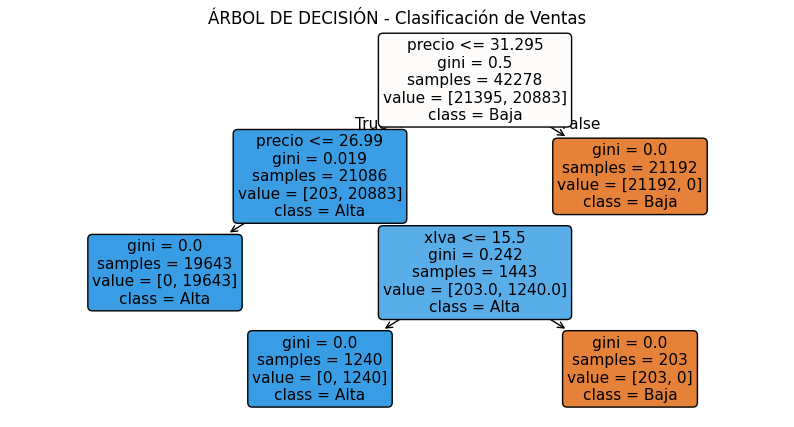

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(modelo, feature_names=X.columns, class_names=['Baja', 'Alta'], filled=True, rounded=True)
plt.title("ÁRBOL DE DECISIÓN - Clasificación de Ventas")
plt.show()

**VALIDACIÓN CRUZADA**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5)
print("Accuracy promedio en CV:", scores.mean())

Accuracy promedio en CV: 1.0


**MODELO: RANDOM FOREST**

**SEPARAR VARIABLES PREDICTORAS Y OBJETIVO**

In [ ]:
X = df_modelo.drop('venta_clasificada_Baja', axis=1)
y = df_modelo['venta_clasificada_Baja']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**ENTRENAR EL MODELO RANDOM FOREST**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

**REALIZAR PREDICCIONES**

In [ ]:
y_pred_rf = rf_model.predict(X_test)

**EVALUAR EL MODELO**

In [ ]:
print("MATRIZ DE CONFUSIÓN - RANDOM FOREST")
print(confusion_matrix(y_test, y_pred_rf))
print("\nREPORTE DE CLASIFICACIÓN - RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))

MATRIZ DE CONFUSIÓN - RANDOM FOREST
[[8930   98]
 [   0 9092]]

REPORTE DE CLASIFICACIÓN - RANDOM FOREST
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      9028
        True       0.99      1.00      0.99      9092

    accuracy                           0.99     18120
   macro avg       0.99      0.99      0.99     18120
weighted avg       0.99      0.99      0.99     18120



**VALIDACIÓN CRUZADA**

In [ ]:
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Accuracy promedio en CV - Random Forest:", rf_scores.mean())

Accuracy promedio en CV - Random Forest: 0.9950163835872997


**COMPARATIVO DE LOS DOS MODELOS: Árbol de Decisión y Random Forest**:

In [ ]:
df['venta_clasificada_'] = df['venta_clasificada'].astype(str)
X = df_modelo.drop('venta_clasificada_Baja', axis=1)
y = df_modelo['venta_clasificada_Baja']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**DEFINIR FUNCIÓN DE EVALUACIÓN OPTIMIZADA**

In [ ]:
def evaluar_modelo(nombre, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return [nombre, accuracy, precision, recall, f1]

**ENTRENAR ÁRBOL DE DECISIÓN**

In [ ]:
modelo_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred_tree = modelo_tree.predict(X_test)
resultado_tree = evaluar_modelo("Árbol de Decisión", y_test, y_pred_tree)

**ENTRENAR RANDOM FOREST**

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
resultado_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)

**COMPARAR RESULTADOS**

In [ ]:
comparacion = pd.DataFrame([resultado_tree, resultado_rf],
                           columns=["MODELO", "ACCURACY", "PRECISION", "RECALL", "F1-SCORE"])
print("COMPARACIÓN DE MODELOS:\n")
display(comparacion)

COMPARACIÓN DE MODELOS:



,MODELO,ACCURACY,PRECISION,RECALL,F1-SCORE
0,Árbol de Decisión,1.000000,1.000000,1.000000,1.000000
1,Random Forest,0.994592,0.994649,0.994592,0.994591


# **DESPLIEGUE**

A. La gráfica muestra la relación entre los ingresos de los clientes y el total comprado, segmentado por categoría de producto.

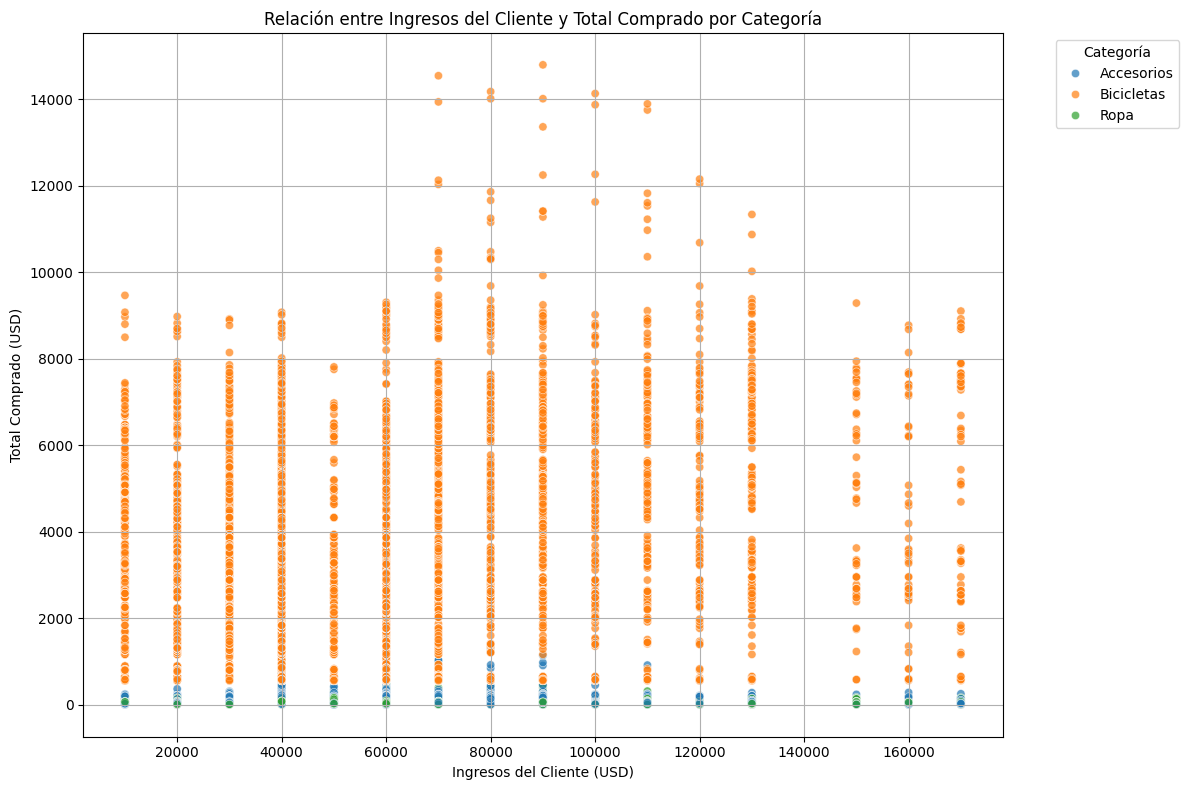

In [ ]:
df_marketing = df[['codcliente', 'ingresos', 'total_venta', 'categoria']]

cliente_ventas = df_marketing.groupby(['codcliente', 'categoria', 'ingresos'])['total_venta'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=cliente_ventas,
    x='ingresos',
    y='total_venta',
    hue='categoria',
    alpha=0.7
)
plt.title('Relación entre Ingresos del Cliente y Total Comprado por Categoría')
plt.xlabel('Ingresos del Cliente (USD)')
plt.ylabel('Total Comprado (USD)')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis Estratégico:**

***1. Clientes con altos ingresos pero bajo gasto:***

Oportunidad para campañas de retargeting o fidelización con promociones especiales.

***2. Estrategias de up-selling o cross-selling.***

- Clientes con ingresos medios y alto gasto:

- Posibles compradores leales. Se pueden crear programas de recompensas o membresías.

***3. Concentración por categoría:***

Si ciertas categorías son más compradas por clientes de ingresos altos, enfocar la publicidad de esas líneas premium a ese segmento.

***Clientes dispersos sin patrón claro:***

Necesidad de segmentar mejor o aplicar técnicas de clustering para personalización.

B. En la siguiente gráfica revela los productos más frecuentemente comprados junto con el producto más vendido ("HL Road Frame - Red, 58").

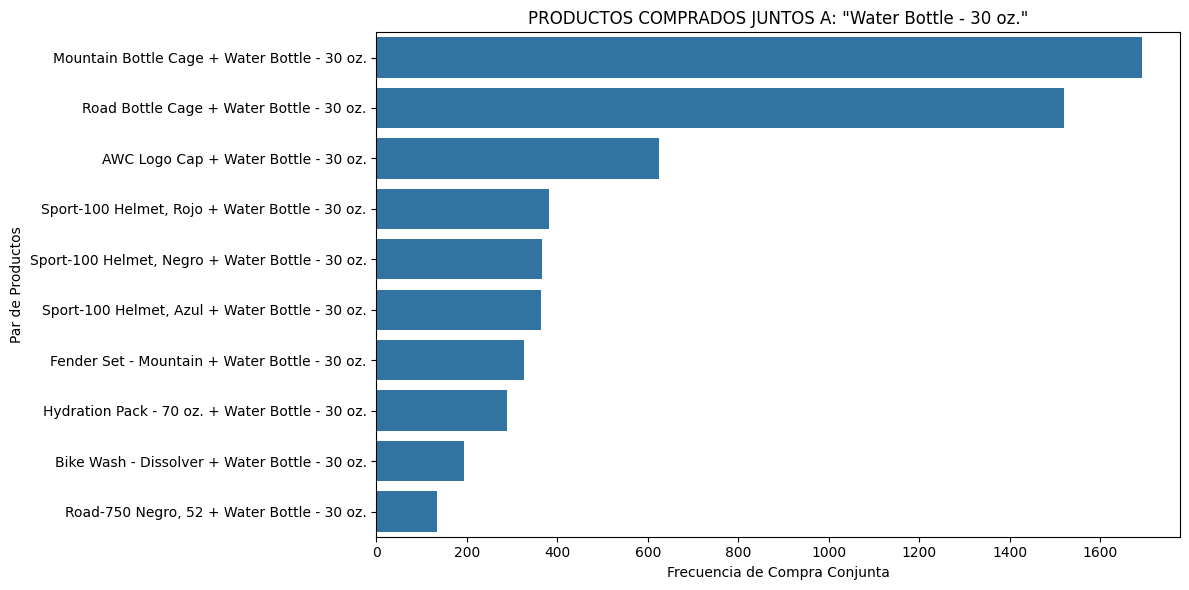

In [ ]:
producto_top = df.groupby('producto')['cantidad'].sum().sort_values(ascending=False).head(1).index[0]
df['orden_id'] = df['fecha_orden'].astype(str) + "_" + df['codcliente'].astype(str)
ordenes = df.groupby('orden_id')['producto'].apply(list)

from collections import Counter
from itertools import combinations

pares = Counter()
for productos in ordenes:
    productos_unicos = list(set(productos))
    for par in combinations(sorted(productos_unicos), 2):
        pares[par] += 1

pares_df = pd.DataFrame(pares.items(), columns=['par_productos', 'frecuencia'])
pares_df[['producto_1', 'producto_2']] = pd.DataFrame(pares_df['par_productos'].tolist(), index=pares_df.index)
pares_df = pares_df.drop(columns='par_productos')

pares_top_producto = pares_df[
    (pares_df['producto_1'] == producto_top) | (pares_df['producto_2'] == producto_top)
].sort_values(by='frecuencia', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pares_top_producto,
    x='frecuencia',
    y=pares_top_producto.apply(lambda x: f"{x['producto_1']} + {x['producto_2']}", axis=1)
)
plt.title(f'PRODUCTOS COMPRADOS JUNTOS A: "{producto_top}"')
plt.xlabel('Frecuencia de Compra Conjunta')
plt.ylabel('Par de Productos')
plt.tight_layout()
plt.show()

**Estrategia de Cross-Selling y Combos:**

***1. Identificación de productos complementarios:***

Los productos que aparecen junto al artículo más vendido pueden formar parte de kits, combos o ser altamente funcionales en conjunto.

***2. Diseño de promociones:***

Se pueden crear ofertas grupales (descuentos por compra conjunta) que impulsen aún más el volumen de ventas.

***3. Sugerencias en tienda online o retail:***

Implementar recomendaciones automáticas del tipo “Clientes que compraron este producto también adquirieron”.